In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import math
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/RISHABH/Desktop/Machine Learning/weatherHistory.csv",index_col=0,encoding="utf-8")

In [4]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [56]:
x_train=df['Humidity'][:10000]
y_train=df['Temperature (C)'][:10000]

In [57]:
print("Number of train examples:" ,len(x_train)) #m

Number of train examples: 10000


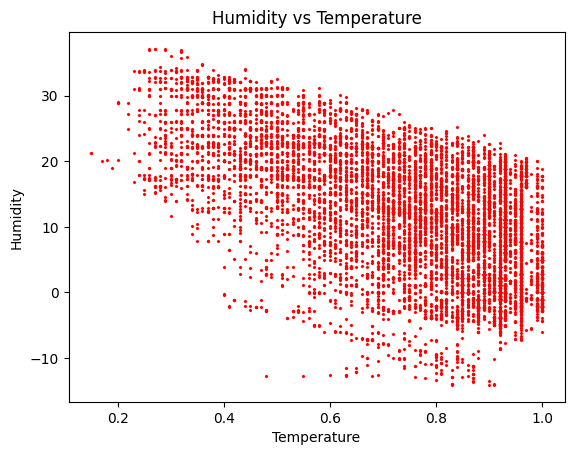

In [68]:
plt.scatter(x_train,y_train,marker='x',color='r',s=2)
plt.title("Humidity vs Temperature")
plt.ylabel("Humidity")
plt.xlabel("Temperature")
plt.show()

In [59]:
def compute_cost(x,y,w,b):

    m=x.shape[0]
    total_cost=0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        total_cost=total_cost+(f_wb_i-y[i])**2
    total_cost=total_cost/(2*m)
    return total_cost

In [60]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_dw=dj_dw+(f_wb_i-y[i])*x[i]
        dj_db=dj_db+(f_wb_i-y[i])
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db 


In [61]:
def gradient_descent(x,y,w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m=len(x)
    J_history=[]
    w_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(m):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<1000000:
            cost=cost_function(x,y,w,b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
             w_history.append(w)
             print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [62]:
initial_w=0.
initial_b=0.
iterations = 10000
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   116.14   
Iteration 1000: Cost    44.57   
Iteration 2000: Cost    39.11   
Iteration 3000: Cost    35.71   
Iteration 4000: Cost    33.58   
Iteration 5000: Cost    32.25   
Iteration 6000: Cost    31.41   
Iteration 7000: Cost    30.90   
Iteration 8000: Cost    30.57   
Iteration 9000: Cost    30.37   
w,b found by gradient descent: -26.588807681203516 31.574394810515745


In [64]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Temperature')

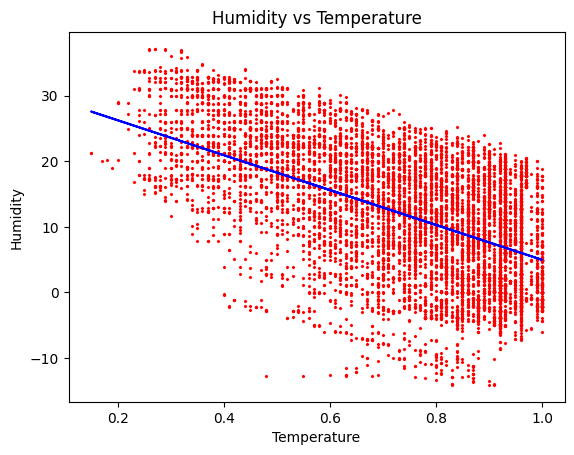

In [69]:
plt.plot(x_train, predicted, c = "b") 
plt.scatter(x_train, y_train, marker='x', c='r',s=2) 
plt.title("Humidity vs Temperature")
plt.ylabel('Humidity')
plt.xlabel('Temperature')